## Descriptive Statistical Data Analysis

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the customer tip dataset and print the first five observations

In [24]:
cust_tip_df = pd.read_csv('https://olympus.greatlearning.in/courses/61567/files/3995007/download?verifier=p69QIUmC4lkILMCB5wxY4qJVV8m4sAF1LFgoPf0r&wrap=1')
print(cust_tip_df.shape )
cust_tip_df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Print the column names of categorical and numerical variables in the data


In [3]:
cat_cols = [col for col in cust_tip_df.columns if cust_tip_df[col].dtype=="O"]
num_cols = [col for col in cust_tip_df.columns if cust_tip_df[col].dtype!="O"]
print("The categorical columns are {}".format(cat_cols)) 
print("The numerical columns are {}".format(num_cols)) 

The categorical columns are ['sex', 'smoker', 'day', 'time']
The numerical columns are ['total_bill', 'tip', 'size']


### 2. Print the average value of Total bill amount and tips

In [4]:
col_lst=['total_bill', 'tip']
cust_tip_df[col_lst].mean().to_frame(name='Average')

,Average
total_bill,19.785943
tip,2.998279


### 3. Compute the average bill amount for each day


In [6]:
cust_tip_df.groupby('day').agg(Total_Bill_Avg=('total_bill','mean'))

,Total_Bill_Avg
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


Sunday has the highest average total bill amount. And the second highest is Saturday. People spend more at restaurants on the weekends.

### 4. Which gender is more generous in giving the tip?</b>


In [14]:
summary_df = cust_tip_df.groupby('sex').agg(Tip_Median=('tip','median'))
female_median_tip = summary_df.loc['Female','Tip_Median']
male_median_tip = summary_df.loc['Male','Tip_Median']

if female_median_tip > male_median_tip:
    print('The median tip of Female is %0.2f which is higher than the median tip of male %0.2f.\nHence female are more generous in giving the tip.' %(female_median_tip,male_median_tip))
elif female_median_tip < male_median_tip:
    print('The median tip of Male is %0.2f which is higher than the median tip of female %0.2f.\nHence Male are more generous in giving the tip.' %(male_median_tip, female_median_tip))
else:
    print('Both male and female median tip value is %0.2f and are same.\nHence both are equally generous in giving tips.')

The median tip of Male is 3.00 which is higher than the median tip of female 2.75.
Hence Male are more generous in giving the tip.


### 5. According to the data, were there more customers for dinner or lunch? </b>


In [13]:
# we group by time and take the sum of size to get no of customers for each time
noofcust_df = cust_tip_df.groupby('time').agg(NoOfCustomers=('size','sum'))
dinner_noofcust = noofcust_df.loc['Dinner','NoOfCustomers']
lunch_noofcust = noofcust_df.loc['Lunch','NoOfCustomers']

if dinner_noofcust > lunch_noofcust:
    print('The No of Customers for Dinner is %d which is more than the No of Customers for Lunch %d.' %(dinner_noofcust,lunch_noofcust))
elif lunch_noofcust > dinner_noofcust:
    print('The No of Customers for Lunch is %d which is more than the No of Customers for Dinner %d.' %(lunch_noofcust, dinner_noofcust))
else:
    print('Both male and female median tip value is %0.2f and are same.\nHence both are equally generous in giving tips.')

The No of Customers for Dinner is 463 which is more than the No of Customers for Lunch 164.


### 6. comment on the variable 'tip' based on its measure of dispersion 

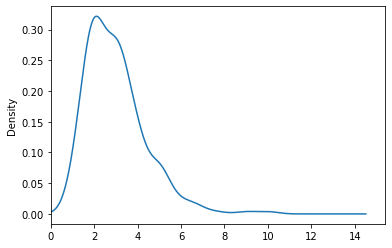

In [12]:
cust_tip_df['tip'].plot(kind='kde')
plt.xlim(0)
plt.show()

Tip is right-skewed hence IQR could be the best choice for measure the dispersion

In [5]:
cust_tip_df['tip'].quantile([0.25,0.50,0.75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

Tips has a median of 2.9 with the range of middle half of the data being between 2 to 3.6.

### 7. Compare the deviation of Numerical variables and comment which feature is having more deviation

In [13]:
# select only the numerical columns
num_data = cust_tip_df.select_dtypes(include=np.number)

# define function to calculate Coefficient of Variance
cv = lambda x: np.std(x) / np.mean(x)

num_data.apply(cv).to_frame(name='coeff_var')

,coeff_var
total_bill,0.449013
tip,0.460531
size,0.369366


Tip is more dispersed around the mean than Total Bill and Size. And Total Bill is more dispersed around the mean than size.

### 8. Plot the distribution of bill amount and tip and comment about its normality

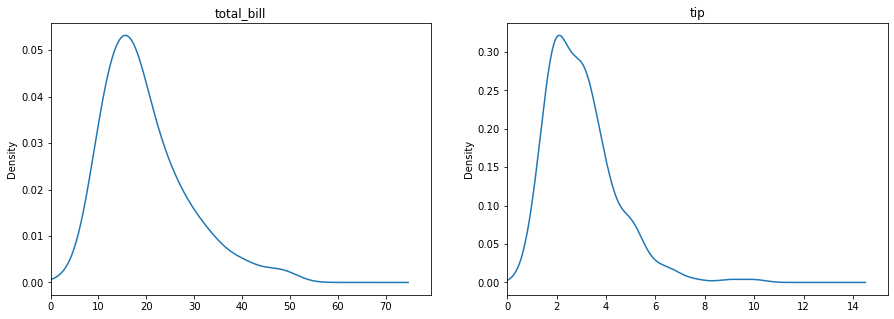

In [21]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
for i,col in enumerate(['total_bill','tip']):
    cust_tip_df[col].plot(kind='kde', ax=axes[i])
    axes[i].title.set_text(col)
    axes[i].set_xlim(0)
plt.show()

The plots are righ-skewed.

In [14]:
measures_df = pd.DataFrame()
measures_df = measures_df.append(cust_tip_df[['total_bill','tip']].mean().to_frame(name='mean').T)
measures_df=measures_df.append(cust_tip_df[['total_bill','tip']].median().to_frame(name='median').T)
mode_df = cust_tip_df[['total_bill','tip']].mode()
mode_df.index=['mode']
measures_df = measures_df.append(mode_df)
measures_df

,total_bill,tip
mean,19.785943,2.998279
median,17.795000,2.900000
mode,13.420000,2.000000


The mean, median and mode are same for normal distribution. Here they are not same.

In [15]:
cust_tip_df[['total_bill','tip']].skew().to_frame(name='skewness')

,skewness
total_bill,1.133213
tip,1.465451


Skewness is close to 0 for normal distribution. Here the skewness is > 1.

In [23]:
def normaility_check(data, col):
    mu = np.mean(data)
    med = np.median(data)
    sk = stats.skew(data)
    sd = np.std(data, ddof=1)
    onesd = [x for x in data if x >= mu-sd and x <= mu+sd]
    twosd = [x for x in data if x >= mu-2*sd and x <= mu+2*sd]
    threesd = [x for x in data if x >= mu-3*sd and x <= mu+3*sd]
    sml = len(data)
    onesd_pct = len(onesd)/sml*100
    twosd_pct = len(twosd)/sml*100
    threesd_pct = len(threesd)/sml*100
    print(col,':')
    print("The percentage of data that lies between plus or minus 1 SD is %0.1f%% " % onesd_pct)
    print("The percentage of data that lies between plus or minus 2 SD is %0.1f%% " % twosd_pct)
    print("The percentage of data that lies between plus or minus 3 SD is %0.1f%%\n" % threesd_pct)
    print("The mean is %0.2f and the median is %0.2f " % (mu,med))
    print("The skewness is %0.2f\n" % sk)
    
for col in ['total_bill','tip']:
    normaility_check(cust_tip_df[col], col)

total_bill :
The percentage of data that lies between plus or minus 1 SD is 72.1% 
The percentage of data that lies between plus or minus 2 SD is 94.3% 
The percentage of data that lies between plus or minus 3 SD is 98.4%

The mean is 19.79 and the median is 17.80 
The skewness is 1.13

tip :
The percentage of data that lies between plus or minus 1 SD is 74.6% 
The percentage of data that lies between plus or minus 2 SD is 95.9% 
The percentage of data that lies between plus or minus 3 SD is 98.8%

The mean is 3.00 and the median is 2.90 
The skewness is 1.46



**Total Bill**

The skewness greater than 0.5. Hence it is not normally distributed.

**Tip**

The %age of data that lies between 1 SD is 74.6% which is 7% greater than standard values (68%) of normal distribution.
The skewness is greater than 0.5. Hence it is not normally distributed. 

### 9. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


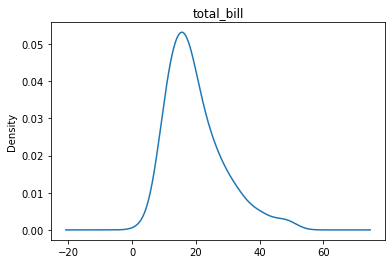

In [17]:
# type your code here
cust_tip_df['total_bill'].plot(kind='kde')
plt.title('total_bill')
plt.show()

In [18]:
cust_tip_df['total_bill'].skew()

1.1332130376158205

Yes, Total Bill is skewed and it is righ-skewed. Sknewness > 1 indicates it is highly skewed.

### 10. Apply the suitable transformation to reduce the skew of the variable "total_bill"

In [44]:
total_bill_power = np.power(cust_tip_df['total_bill'],0.1) 
total_bill_power.name = 'power.1'
total_bill_boxcox = pd.Series(stats.boxcox(cust_tip_df['total_bill'])[0], name='boxcox')
print("The skewness after applying boxcox transform is %.2f" % total_bill_boxcox.skew())         
print("The skewness after applying 0.1 power is %.2f" % total_bill_power.skew())    

The skewness after applying boxcox transform is 0.00
The skewness after applying 0.1 power is 0.04


BoxCox Transformation is the most suitable Transformation with skewness almost 0. The next suitable transformation is to the power of 0.1

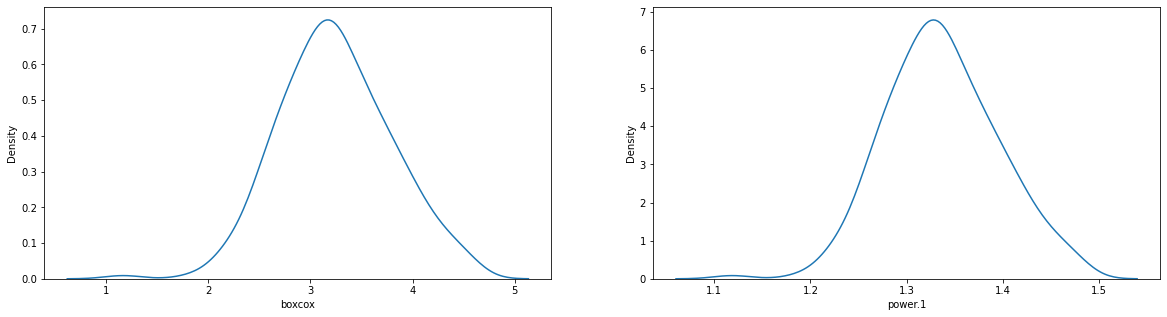

In [30]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
for i,col in enumerate(total_bill_transform_df):
    sns.kdeplot(x=total_bill_transform_df[col], ax=axes[i])
plt.show()

### 11. Analyze the relation between bill_amount and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

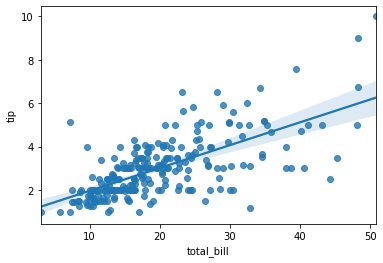

In [32]:
sns.regplot(x='total_bill', y='tip', data=cust_tip_df)

In [22]:
stats.pearsonr(cust_tip_df['tip'], cust_tip_df['total_bill'])

(0.6757341092113645, 6.692470646863477e-34)

[0-0.19 - very weak, 0.2-0.39 - weak, 0.40-0.59 - moderate, 0.6-0.79 - strong, 0.8-1 - very strong correlation]

There is a strong positive linear correlation between tips and total bill.
As the total bill increases tips also increases at a little slower rate.

### 12. Find the covaraiance and correlation between bill_amount and tips. Infer the results

In [23]:
covar = np.cov(cust_tip_df['tip'], cust_tip_df['total_bill'])[0,1]
print('The covariance of total bill amount and tips is %.2f' % covar)

The covariance of total bill amount and tips is 8.32


In [24]:
corr,_ = stats.pearsonr(cust_tip_df['tip'], cust_tip_df['total_bill'])
print('The correlation of total bill amount and tips is %.2f' % corr)

The correlation of total bill amount and tips is 0.68


A positive covariance indicates there is positive relationship between tips and total bill ie as the total bill increases the tips also increases. 

To determine the strength of this positive relationship we compute the correlation. The correlation coefficient is between 0.6 and 0.8, which indicates there is a strong positive linear relationship between them.

### 13. Analyze the relation between bill_amount, tips and sex

#### Scatter Plot

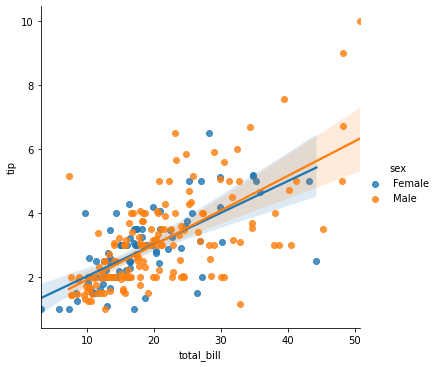

In [30]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=cust_tip_df)
plt.show()

In general there is not much difference between the total bill and tip relationship based on sex as the male and female regression line almost overlap. 

In rare cases, generally males pay extremely high bill amount and also provide extremely high tips.

There is a slight difference in the rate of increase of tips as the total_bill increases between Male and Female. The rate at which tips increase as the total_bill increases is slightly higher for males.

### 14. Find the average number of customer for dinner and Lunch for each day 

In [16]:
cust_tip_df.pivot_table(index='day',columns='time', values='size', aggfunc=np.sum).mean().round().to_frame(name='Avg_NoofCustomers')

,Avg_NoofCustomers
time,
Dinner,116.0
Lunch,82.0


On an average 116 customers are expected for Dinner for each day and 82 customers are expected for Lunch for each day. 

The number of customers expected for Dinner is higher than the  number of customers expected for Lunch.



### 15. Find the average bill-amount  for dinner and Lunch for each day

In [18]:
cust_tip_df.pivot_table(index='day', columns='time', values='total_bill', aggfunc=np.sum).mean().to_frame(name='Average_Bill_Amount')

,Average_Bill_Amount
time,
Dinner,915.075
Lunch,583.735


The average Total bill amount is higher for Dinner.

### 16. Comment about the tips given by the smokers

#### Box Plot

<AxesSubplot:xlabel='smoker', ylabel='tip'>

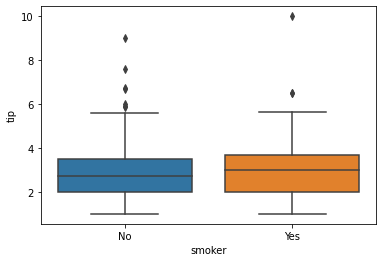

In [28]:
sns.boxplot(x='smoker',y='tip', data=cust_tip_df)

#### Group by

In [29]:
cust_tip_df.groupby('smoker').agg(Tip_Median=('tip','median'))

,Tip_Median
smoker,
No,2.74
Yes,3.00


Median is used as the data has outliers. The median tips of smokers are slightly higher than non-smokers. Hence Smokers tend to tip slightly more than non-smokers.

Non-smokers are more likely to make extremely high tips.

### 17.Create a Pivot table with sex and smokers with their average tip amount

In [19]:
cust_tip_df.pivot_table(index='sex', columns='smoker', values='tip', aggfunc=np.mean).round(2)

smoker,No,Yes
sex,,
Female,2.77,2.93
Male,3.11,3.05


The avg tip of non-smoker male is the highest. Hence non-smoker Male is likely to tip more.

The average tip of non-smoker female is the lowest. Hence non-smoker Female is likely to tip less.

### 18. Compute the tips per person for each observation (tips/size)

In [31]:
cust_tip_df['tip_per_person'] = cust_tip_df['tip']/cust_tip_df['size']
cust_tip_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500


### 19. Compute the kurtosis value of each numerical variable and comment about it

In [32]:
num_data.kurtosis()

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

Tips has heavier tails (kurtosis>3) indicating leptokurtic. 

Total bill and size have lighter tails (kurtosis < 3) indicating platokurtic

### 20. Check whether how much percentage of data exists between +/-1 sigma from the mean of the column total_bill

In [22]:
bill_std = cust_tip_df['total_bill'].std()
bill_mean = cust_tip_df['total_bill'].mean()
minus_one_sigma = bill_mean - bill_std
plus_one_sigma = bill_mean + bill_std
onesigma_rowcount = cust_tip_df[(cust_tip_df.total_bill>=minus_one_sigma)&(cust_tip_df.total_bill<=plus_one_sigma)].shape[0]
total_rowcount = len(cust_tip_df.index)
onesigma_pct = onesigma_rowcount/total_rowcount * 100
print("%.1f%% of customers have total bill between +1 Sigma %.1f and -1 Sigma %.1f" %(onesigma_pct, plus_one_sigma,minus_one_sigma))

72.1% of customers have total bill between +1 Sigma 28.7 and -1 Sigma 10.9
